In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 3 DECISIONTREES/DECISIONTREES/DECISIONTREES DECISIONTREES 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [2]:
# =================================================-
#### Slide 3: Loading packages  ####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D

In [3]:
main_dir = Path.cwd().parent
data_dir = main_dir / "data"
plot_dir = main_dir / "plot"

In [4]:
plot_dir.mkdir(exist_ok=True)

In [5]:
# =================================================-
#### Slide 4: Load data into Python  ####

df = pd.read_csv(data_dir / "healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# =================================================-
#### Slide 5: Subset data  ####

# df = df[
#     [
#         "age",
#         "avg_glucose_level",
#         "heart_disease",
#         "ever_married",
#         "hypertension",
#         "Residence_type",
#         "gender",
#         "smoking_status",
#         "work_type",
#         "stroke",
#         "id",
#     ]
# ]
# print(df.head())

In [7]:
df = df.set_index("id")

In [8]:
dummy_df = pd.get_dummies(df, columns=df.select_dtypes("object").columns)
dummy_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
51676,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
31112,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
60182,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,NaN,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
44873,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
19723,35.0,0,0,82.99,30.6,0,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
dummy_df = pd.DataFrame(
    imputer.fit_transform(dummy_df), columns=dummy_df.columns, index=df.index
)

In [10]:
# Split the data into X and y
X = dummy_df.drop(columns="stroke")
y = dummy_df["stroke"]

In [11]:
# =================================================-
#### Slide 6: Data prep: check for NAs  ####

# # Check for NAs.
# print(df.isnull().sum())
# percent_missing = df.isnull().sum() * 100 / len(df)
# print(percent_missing)

In [12]:
# =================================================-
#### Slide 7: Data prep: check for NAs  ####

# # Delete columns containing either 50% or more than 50% NaN Values
# perc = 50.0
# min_count = int(((100 - perc) / 100) * df.shape[0] + 1)
# df = df.dropna(axis=1, thresh=min_count)
# print(df.shape)


# # Function to impute NA in both numeric and categorical columns
# def fillna(df):
#     # Fill numeric columns with mean value
#     df = df.fillna(df.mean())
#     # Fill categorical columns with mode value
#     df = df.fillna(df.mode().iloc[0])
#     return df

# df = fillna(df)

In [13]:
# =================================================-
#### Slide 8: Data prep: target  ####

# print(df["stroke"].dtypes)
# # Identify the the two unique classes
# threshold = df["stroke"].mean()
# df["stroke"] = np.where(df["stroke"] > threshold, 1, 0)
# unique_values = sorted(df["stroke"].unique())
# df["stroke"] = np.where(df["stroke"] == unique_values[0], False, True)
# # Check class again.
# print(df["stroke"].dtypes)

In [14]:
# =================================================-
#### Slide 9: Summarize the data  ####

# print(df.describe())

In [15]:
# =================================================-
#### Slide 13: Decision Tree: splitting the data  ####

# # Split the data into X and y
# columns_to_drop_from_X = ["stroke"] + ["id"]
# X = df.drop(columns_to_drop_from_X, axis=1)
# y = np.array(df["stroke"])

In [16]:
# =================================================-
#### Slide 14: Data prep: numeric variables  ####

# X = pd.get_dummies(
#     X,
#     columns=[
#         "heart_disease",
#         "ever_married",
#         "hypertension",
#         "Residence_type",
#         "gender",
#         "smoking_status",
#         "work_type",
#     ],
#     dtype=float,
#     drop_first=True,
# )
# print(X.dtypes)

In [17]:
# =================================================-
#### Slide 15: Decision Tree: running the algorithm  ####

# Implement the decision tree on X.
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

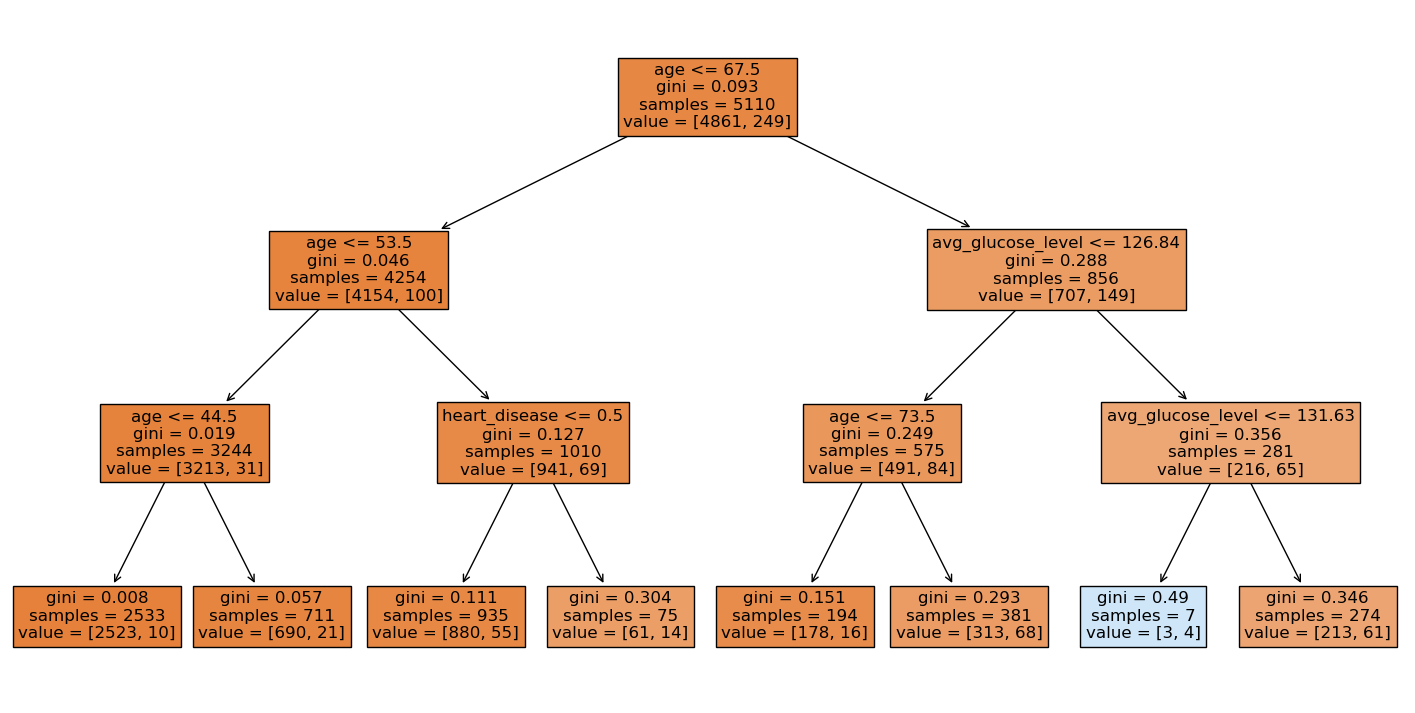

In [18]:
# =================================================-
#### Slide 16: Visualize: plot_tree  ####

# Set figure size
fig = plt.figure(figsize=(18, 9))
# Visualize `clf_fit_small`
tree.plot_tree(clf, feature_names=X.columns, filled=True, fontsize=12)
# Save figure
plt.savefig(plot_dir / "tree.png", bbox_inches="tight")

In [19]:
# =================================================-
#### Slide 19: Split into train and test sets  ####

# Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3577, 20) (3577,)
(1533, 20) (1533,)


In [20]:
# =================================================-
#### Slide 20: Fit Decision Tree and predict  ####

# Implement the decision tree on X_train.
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on X_test.
y_predict = clf.predict(X_test)
y_predict[:20]


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 3 DECISIONTREES/DECISIONTREES/DECISIONTREES DECISIONTREES 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [22]:
# =================================================-
#### Slide 5: Evaluate the model (cont'd)  ####

# # Confusion matrix for first model.
# cm_tree = confusion_matrix(y_test, y_predict)
# # Accuracy score.
# acc_score = accuracy_score(y_test, y_predict)
# print(acc_score)

In [23]:
# =================================================-
#### Slide 6: Plot confusion matrix  ####

# plt.clf()
# plt.imshow(cm_tree, interpolation="nearest", cmap=plt.cm.Wistia)
# classNames = ["Negative", "Positive"]
# plt.title("Confusion Matrix - Test Data")
# plt.ylabel("True label")
# plt.xlabel("Predicted label")
# tick_marks = np.arange(len(classNames))
# plt.xticks(tick_marks, classNames, rotation=45)
# plt.yticks(tick_marks, classNames)
# s = [["TN", "FP"], ["FN", "TP"]]
# for i in range(2):
#     for j in range(2):
#         plt.text(j, i, str(s[i][j]) + " = " + str(cm_tree[i][j]))
# plt.show()

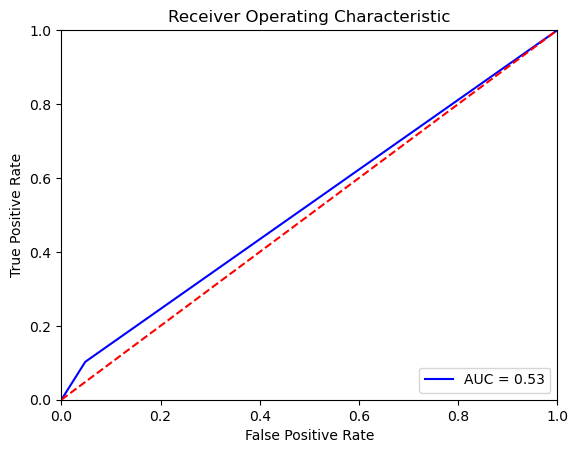

In [24]:
# =================================================-
#### Slide 7: Plot ROC and calculate AUC  ####


# Calculate metrics for ROC (fpr, tpr) and calculate AUC.
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC.
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [25]:
# =================================================-
#### Slide 9: Decision Tree: build  ####

# Set up logistic regression model.
clf = tree.DecisionTreeClassifier()
print(clf)

DecisionTreeClassifier()


In [26]:
# =================================================-
#### Slide 10: Decision Tree: fit  ####

# Fit the model.
clf_fit = clf.fit(X_train, y_train)

In [27]:
# =================================================-
#### Slide 11: Decision Tree: predict  ####

# Predict on X_test.
y_predict = clf_fit.predict(X_test)
print(y_predict[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
# =================================================-
#### Slide 12: Decision Tree: accuracy score  ####

# Compute test model accuracy score.
tree_accuracy_score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy on test data: ", tree_accuracy_score)

Accuracy on test data:  0.9099804305283757


In [29]:
# =================================================-
#### Slide 13: Decision Tree: train accuracy  ####

# Compute accuracy using training data.
acc_train_tree = clf_fit.score(X_train, y_train)
print("Train Accuracy:", acc_train_tree)

Train Accuracy: 1.0


In [30]:
# =================================================-
#### Slide 14: Decision Tree: accuracy  ####

# Save this model to use later if needed
model_final_tree = {
    "metrics": "accuracy",
    "values": round(tree_accuracy_score, 4),
    "model": "tree_all_variables",
}
print(model_final_tree)

{'metrics': 'accuracy', 'values': 0.91, 'model': 'tree_all_variables'}


In [31]:
# =================================================-
#### Slide 20: Cross-validation scores  ####

clf = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X, y, cv=10)
# Print each cv score (accuracy) and average them.
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

[0.90410959 0.90019569 0.91193738 0.90410959 0.88845401 0.92563601
 0.90802348 0.90802348 0.89823875 0.92367906]
cv_scores mean:0.9072407045009785
Optimal cv score is: 0.9072


In [32]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 3 DECISIONTREES/DECISIONTREES/DECISIONTREES DECISIONTREES 4 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [33]:
# =================================================-
#### Slide 4: Define an optimal number function  ####


# Define function that will determine the optimal number for each parameter.
def optimal_parameter(values, test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return best_value

In [34]:
# =================================================-
#### Slide 6: Optimize: max depth  ####

# Max depth:
max_depths = np.linspace(1, 32, 32, endpoint=True).astype(int)
train_results = []
test_results = []

In [35]:
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)

    # Add accuracy score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    # Add accuracy score to previous test results
    test_results.append(acc_test)
# Store optimal max_depth.
optimal_max_depth = optimal_parameter(max_depths, test_results)

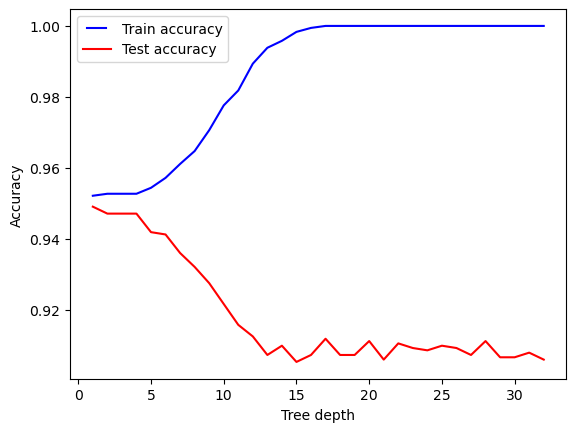

In [36]:
# =================================================-
#### Slide 7: Plot: max depth  ####

# Plot max depth over 1 - 32.
(line1,) = plt.plot(max_depths, train_results, "b", label="Train accuracy")
(line2,) = plt.plot(max_depths, test_results, "r", label="Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Tree depth")
plt.show()

In [37]:
# =================================================-
#### Slide 9: Optimize: min samples split  ####

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    # Add accuracy score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    # Add accuracy score to previous test results
    test_results.append(acc_test)
# Store optimal max_depth.
optimal_min_samples_split = optimal_parameter(min_samples_splits, test_results)

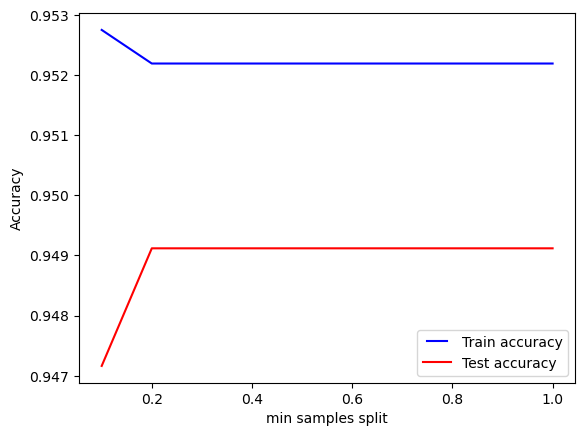

In [38]:
# =================================================-
#### Slide 10: Plot: min samples split  ####

# Plot min_sample split.
(line1,) = plt.plot(min_samples_splits, train_results, "b", label="Train accuracy")
(line2,) = plt.plot(min_samples_splits, test_results, "r", label="Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("min samples split")
plt.show()

In [39]:
# =================================================-
#### Slide 12: Optimize: min samples leaf  ####

# Min_samples_leaf:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    # Add accuracy score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    # Add accuracy score to previous test results
    test_results.append(acc_test)

optimal_min_samples_leafs = optimal_parameter(min_samples_leafs, test_results)

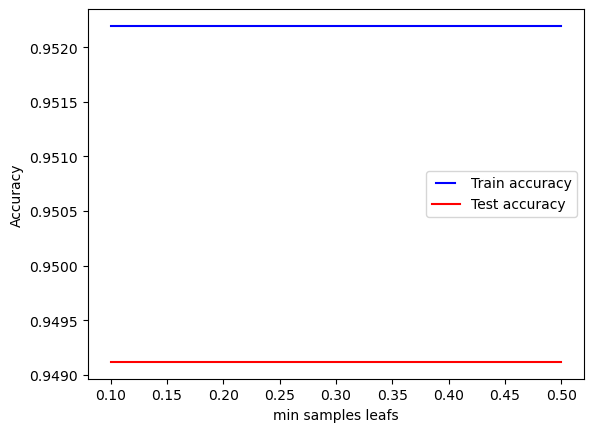

In [40]:
# =================================================-
#### Slide 13: Plot: min samples leaf  ####

# Plot min_sample split.
(line1,) = plt.plot(min_samples_leafs, train_results, "b", label="Train accuracy")
(line2,) = plt.plot(min_samples_leafs, test_results, "r", label="Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("min samples leafs")
plt.show()

In [41]:
# =================================================-
#### Slide 15: Optimize: max features  ####

# Max_features:
max_features = list(range(1, X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    # Add accuracy score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)

    # Add accuracy score to previous test results
    test_results.append(acc_test)

optimal_max_features = optimal_parameter(max_features, test_results)

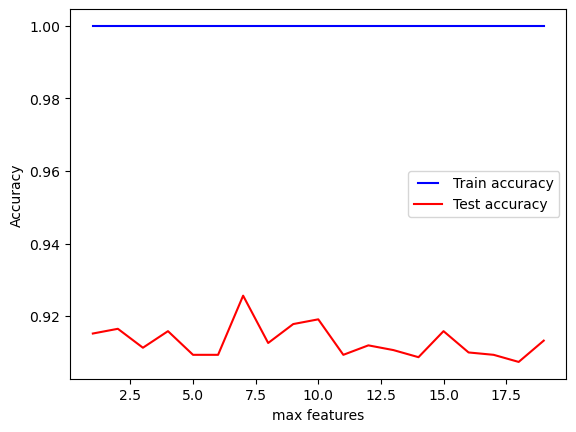

In [42]:
# =================================================-
#### Slide 16: Plot: max features  ####

# Plot min_sample split.
(line1,) = plt.plot(max_features, train_results, "b", label="Train accuracy")
(line2,) = plt.plot(max_features, test_results, "r", label="Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("max features")
plt.show()

In [43]:
# =================================================-
#### Slide 18: Optimized model  ####

print("The optimal max depth is:", optimal_max_depth)
print("The optimal min samples split is:", optimal_min_samples_split)
print("The optimal min samples leaf is:", optimal_min_samples_leafs)
print("The optimal max features is:", optimal_max_features)

The optimal max depth is: 1
The optimal min samples split is: 0.2
The optimal min samples leaf is: 0.1
The optimal max features is: 7


In [44]:
# =================================================-
#### Slide 19: Build optimized model  ####

# Set the seed.
np.random.seed(1)

# Implement the Decision Tree on X_train.
clf_optimized = tree.DecisionTreeClassifier(
    max_depth=optimal_max_depth,
    min_samples_split=optimal_min_samples_split,
    min_samples_leaf=optimal_min_samples_leafs,
    max_features=optimal_max_features,
)

# We can now see our optimized features where before they were just default:
print(clf_optimized)

clf_optimized_fit = clf_optimized.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_features=7, min_samples_leaf=0.1,
                       min_samples_split=0.2)


In [45]:
# =================================================-
#### Slide 20: Predict with optimized model  ####

# Predict on X_test.
y_predict_optimized = clf_optimized_fit.predict(X_test)

# Get the accuracy score.
acc_score_tree_optimized = accuracy_score(y_test, y_predict_optimized)

print(acc_score_tree_optimized)

0.949119373776908


In [46]:
# =================================================-
#### Slide 21: Train accuracy  ####

# Compute accuracy using training data.
acc_train_tree_optimized = clf_optimized_fit.score(X_train, y_train)

print("Train Accuracy:", acc_train_tree_optimized)

Train Accuracy: 0.9521945764607213


In [47]:
# =================================================-
#### Slide 23: Predict and save results  ####

# Add the optimized model to our dataframe.
model_final_tree = {
    "metrics": "accuracy",
    "values": round(acc_score_tree_optimized, 4),
    "model": "tree_all_variables_optimized",
}
print(model_final_tree)

{'metrics': 'accuracy', 'values': 0.9491, 'model': 'tree_all_variables_optimized'}


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [49]:
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric=metrics.f1_score)

In [50]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
gnb.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=<function f1_score at 0x287826ca0>,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

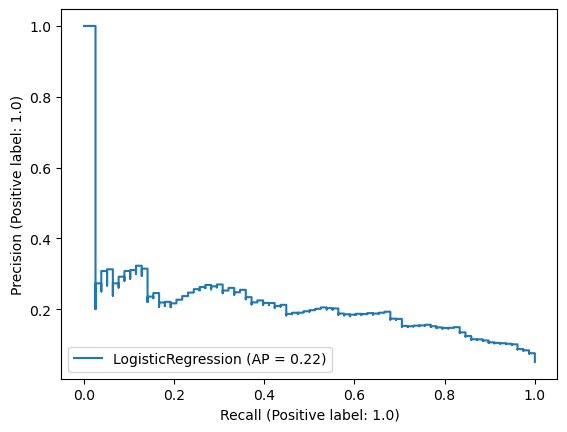

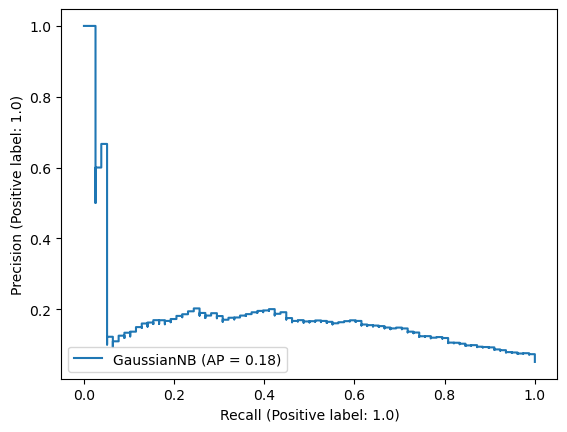

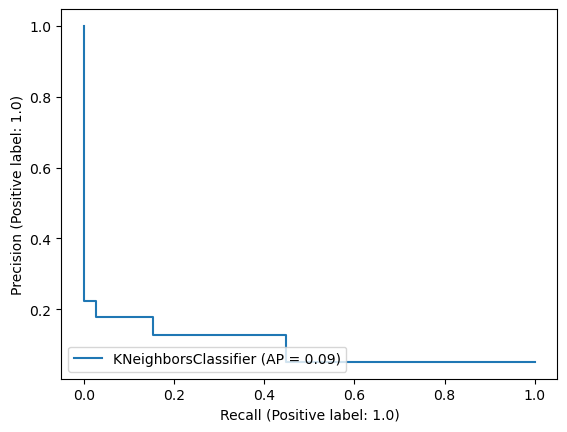

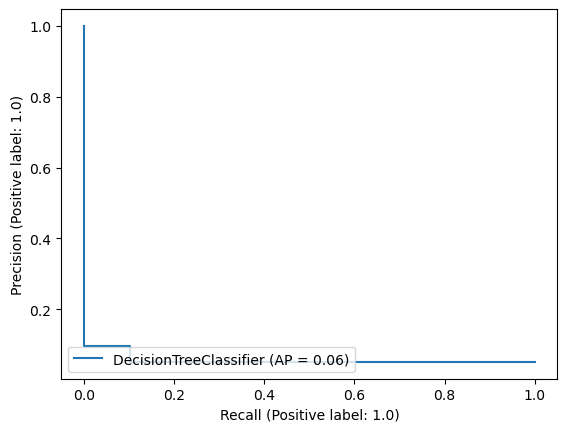

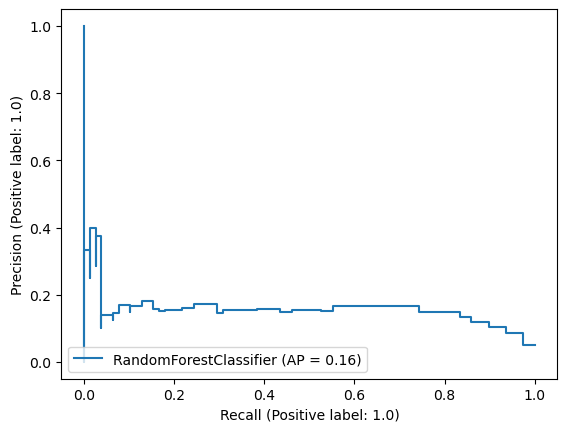

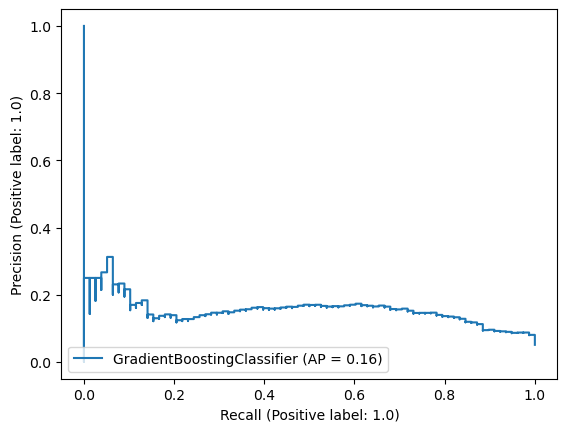

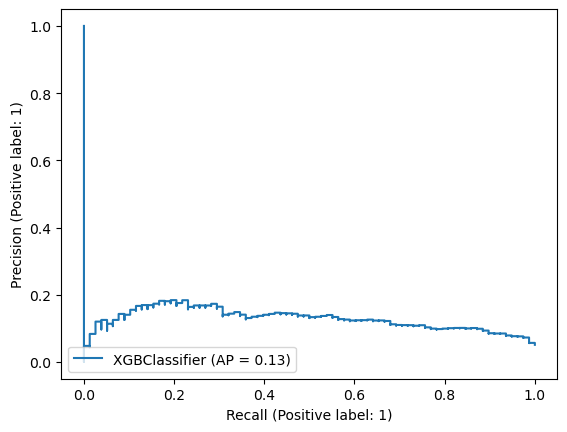

In [51]:
lr_prd = PrecisionRecallDisplay.from_estimator(lr, X_test, y_test)
gnb_prd = PrecisionRecallDisplay.from_estimator(gnb, X_test, y_test)
knn_prd = PrecisionRecallDisplay.from_estimator(knn, X_test, y_test)
dt_prd = PrecisionRecallDisplay.from_estimator(dt, X_test, y_test)
rf_prd = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
gb_prd = PrecisionRecallDisplay.from_estimator(gb, X_test, y_test)
xgb_prd = PrecisionRecallDisplay.from_estimator(xgb, X_test, y_test)

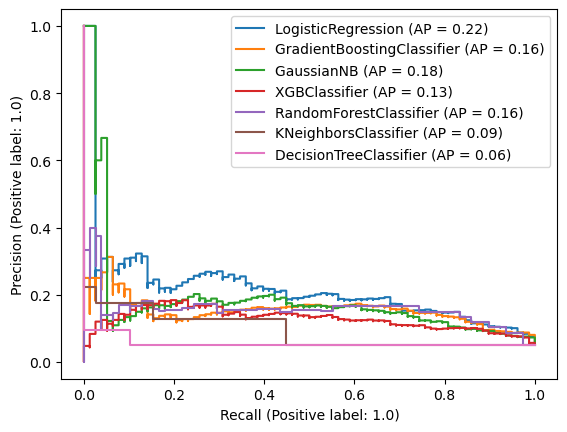

In [52]:
fig, ax = plt.subplots()
lr_prd.plot(ax=ax)
gb_prd.plot(ax=ax)
gnb_prd.plot(ax=ax)
xgb_prd.plot(ax=ax)
rf_prd.plot(ax=ax)
knn_prd.plot(ax=ax)
dt_prd.plot(ax=ax)
ax.legend(loc="upper right");

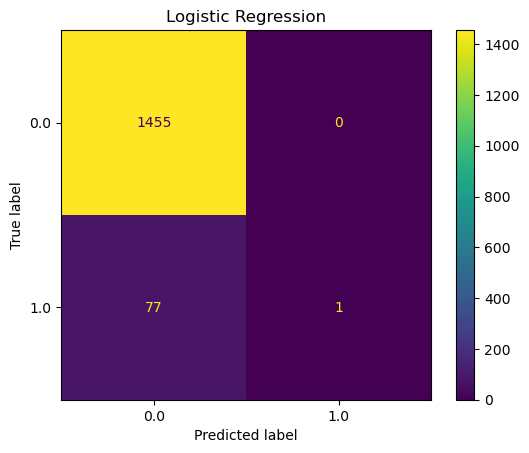

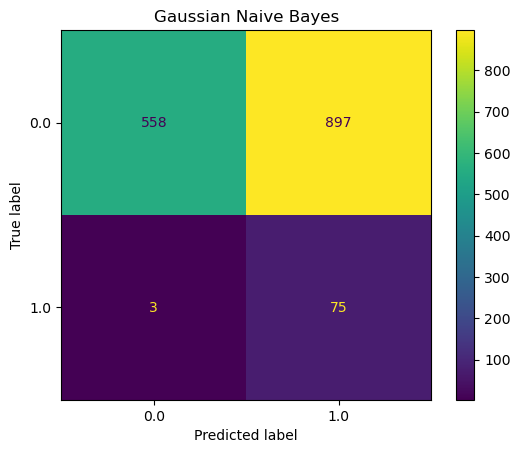

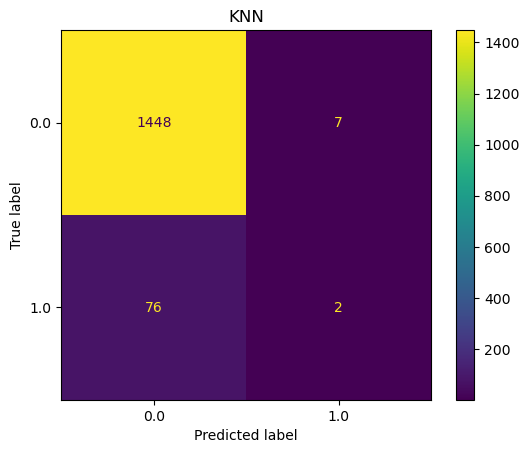

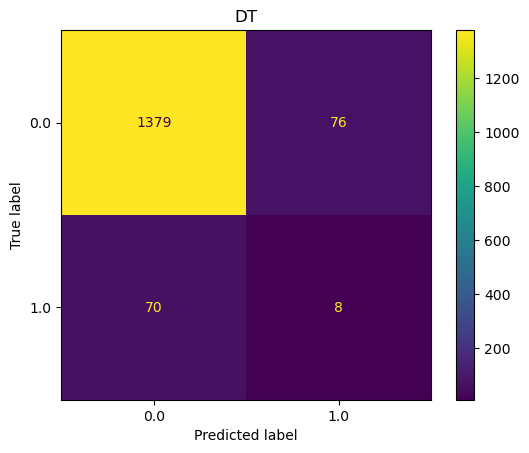

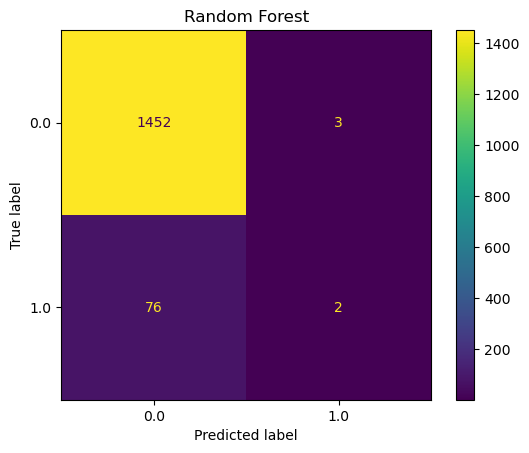

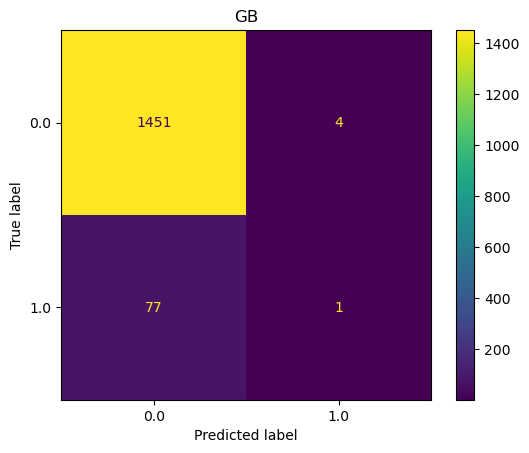

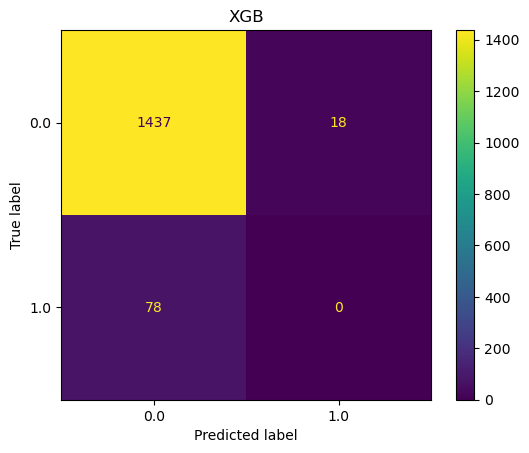

In [53]:
lr_prd = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression")
gnb_prd = ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.title("Gaussian Naive Bayes")
knn_prd = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN")
dt_prd = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("DT")
rf_prd = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest")
gb_prd = ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)
plt.title("GB")
xgb_prd = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.title("XGB");

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
SMOTE

imblearn.over_sampling._smote.base.SMOTE

In [56]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [57]:
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric=metrics.f1_score)

In [58]:
lr.fit(X_res, y_res)
knn.fit(X_res, y_res)
gnb.fit(X_res, y_res)
dt.fit(X_res, y_res)
rf.fit(X_res, y_res)
gb.fit(X_res, y_res)
xgb.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=<function f1_score at 0x287826ca0>,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

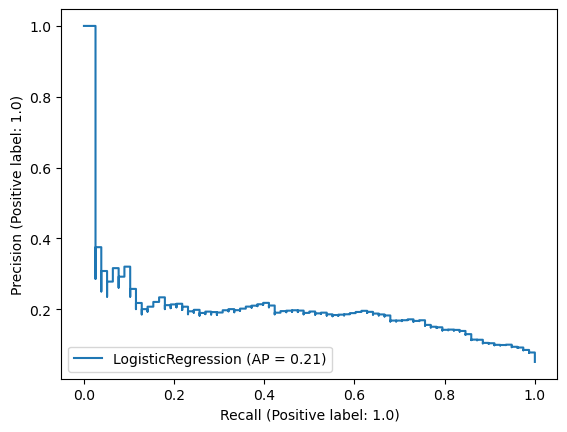

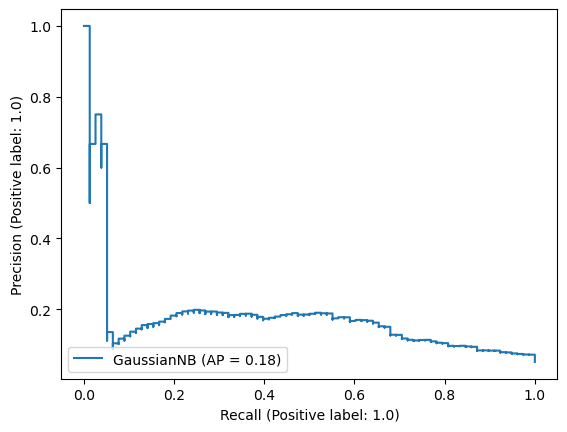

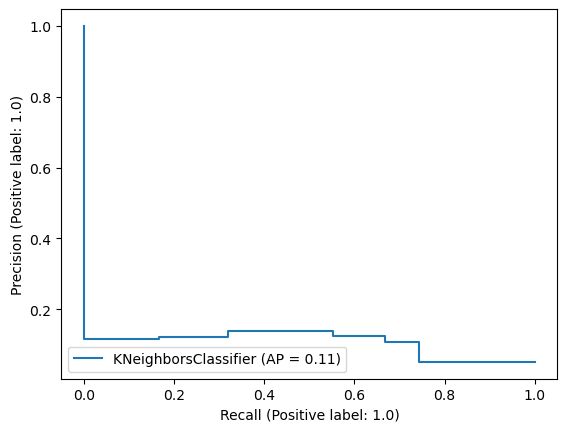

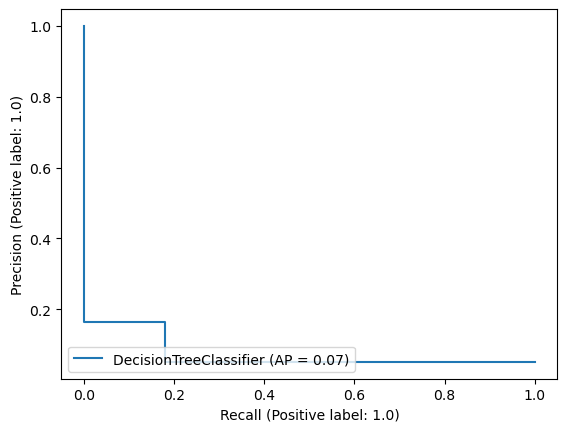

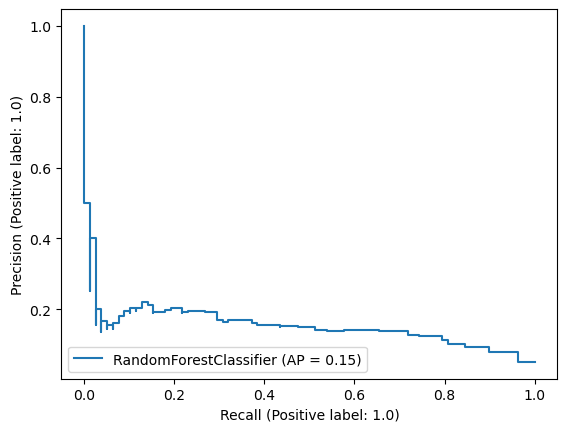

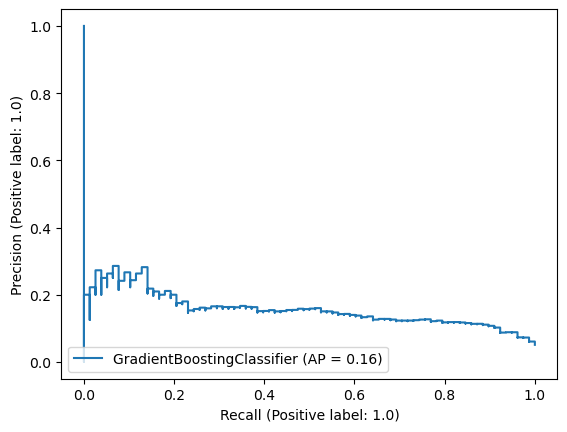

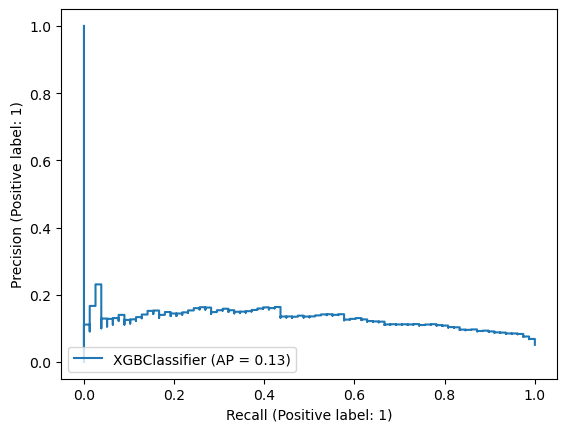

In [59]:
lr_prd = PrecisionRecallDisplay.from_estimator(lr, X_test, y_test)
gnb_prd = PrecisionRecallDisplay.from_estimator(gnb, X_test, y_test)
knn_prd = PrecisionRecallDisplay.from_estimator(knn, X_test, y_test)
dt_prd = PrecisionRecallDisplay.from_estimator(dt, X_test, y_test)
rf_prd = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
gb_prd = PrecisionRecallDisplay.from_estimator(gb, X_test, y_test)
xgb_prd = PrecisionRecallDisplay.from_estimator(xgb, X_test, y_test)

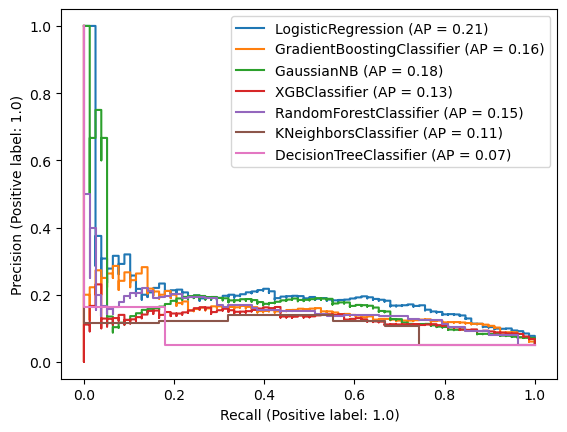

In [60]:
fig, ax = plt.subplots()
lr_prd.plot(ax=ax)
gb_prd.plot(ax=ax)
gnb_prd.plot(ax=ax)
xgb_prd.plot(ax=ax)
rf_prd.plot(ax=ax)
knn_prd.plot(ax=ax)
dt_prd.plot(ax=ax)
ax.legend(loc="upper right");

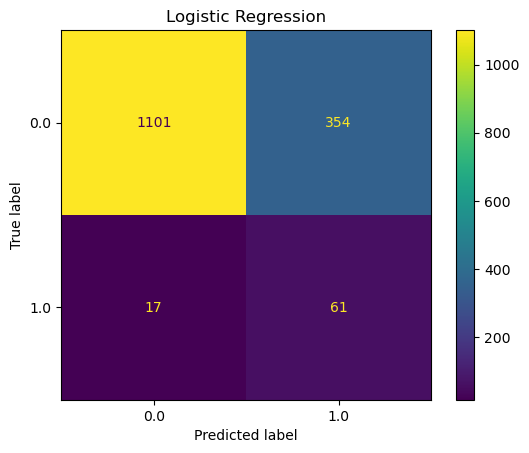

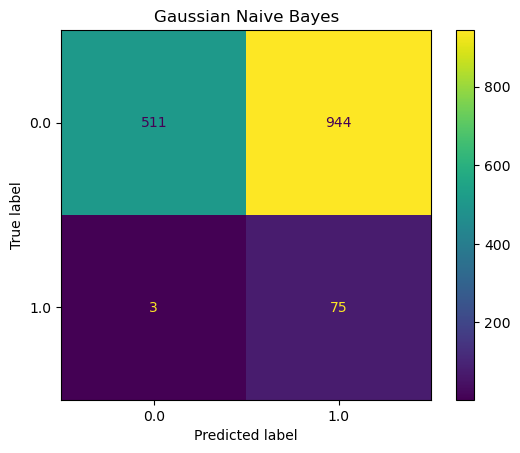

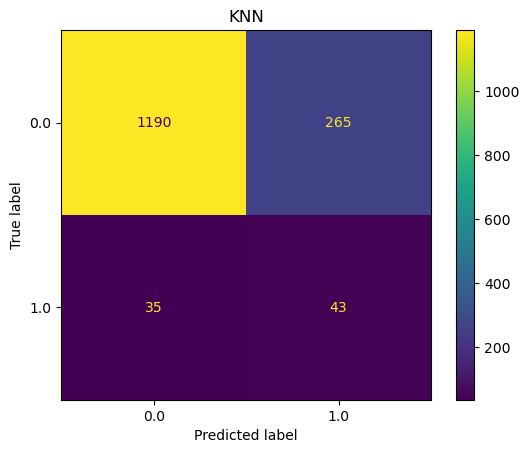

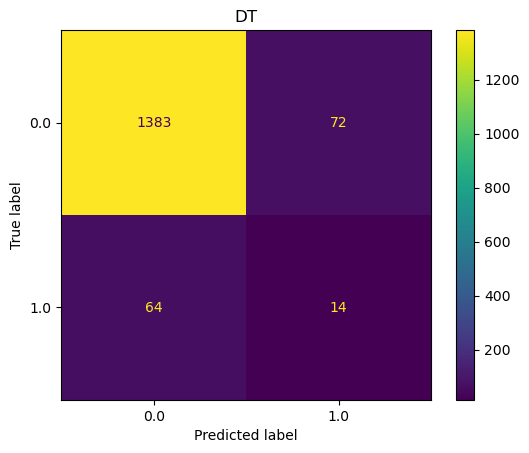

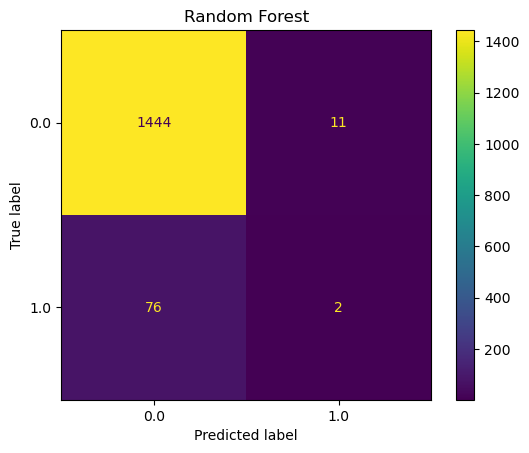

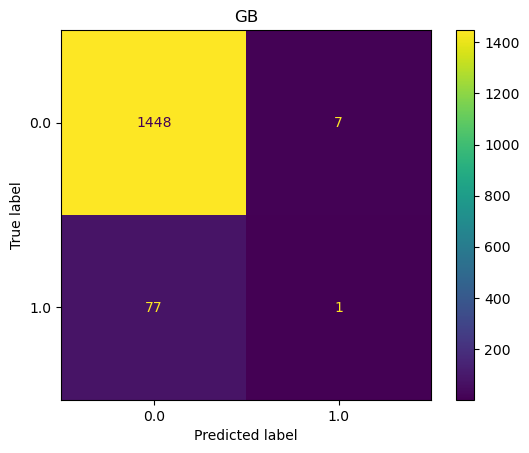

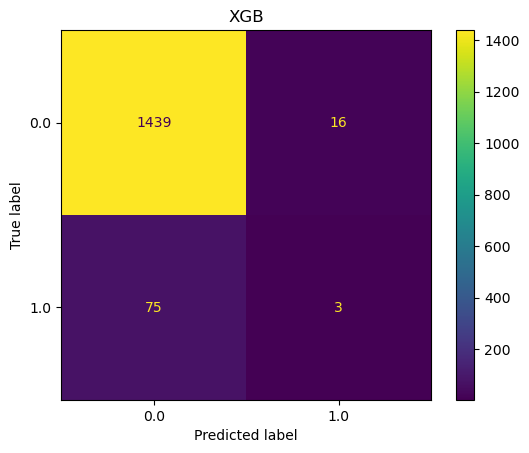

In [61]:
lr_prd = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression")
gnb_prd = ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.title("Gaussian Naive Bayes")
knn_prd = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN")
dt_prd = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("DT")
rf_prd = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest")
gb_prd = ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)
plt.title("GB")
xgb_prd = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.title("XGB");

In [62]:
# =================================================-
#### Slide 25: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################